# NMF Topic Models

Topic modelling aims to automatically discover the hidden thematic structure in a large corpus of text documents. One approach for topic modelling is to apply *matrix factorisation* methods, such as *Non-negative Matrix Factorisation (NMF)*. In this notebook we look at how to apply NMF using the *scikit-learn* library in Python.

### Applying NMF

First, let's load the TF-IDF normalised document-term matrix and list of terms that we stored earlier using *Joblib*:

In [1]:
import joblib

(A, terms, snippets) = joblib.load("cenario2-tweets-tfidf.pkl")

print("Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]))

Loaded 400117 X 12279 document-term matrix


The key input parameter to NMF is the number of topics to generate *k*. For the moment, we will pre-specify a guessed value, for demonstration purposes.

In [2]:
k = 10

Another choice for NMF revolves around initialisation. Most commonly, NMF involves using random initialisation to populate the values in the factors W and H. Depending on the random seed that you use, you may get different results on the same dataset. Instead, using SVD-based initialisation provides more reliable results.

In [3]:
# create the model
from sklearn import decomposition

model = decomposition.NMF(init="nndsvd", n_components=k)

# apply the model and extract the two factor matrices
W = model.fit_transform(A)
H = model.components_

### Examining the Output

NMF produces to factor matrices as its output: *W* and *H*.

The *W* factor contains the document membership weights relative to each of the *k* topics. Each row corresponds to a single document, and each column correspond to a topic.

In [4]:
W.shape

(400117, 10)

For instance, for the first document, we see that it is strongly associated with one topic. However,  each document can be potentially associated with multiple topics to different degrees.

In [5]:
# round to 2 decimal places for display purposes
W[0,:].round(2)

array([0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

The *H* factor contains the term weights relative to each of the *k* topics. In this case, each row corresponds to a topic, and each column corresponds to a unique term in the corpus vocabulary.

In [6]:
H.shape

(10, 12279)

For instance, for the term "brexit", we see that it is strongly associated with a single topic. Again, in some cases each term can be associated with multiple topics.

In [7]:
term_index = terms.index('woman')

# round to 2 decimal places for display purposes
H[:,term_index].round(2)

array([0.  , 0.  , 0.  , 0.  , 6.26, 0.  , 0.  , 0.  , 0.  , 0.  ])

### Topic Descriptors

The top ranked terms from the *H* factor for each topic can give us an insight into the content of that topic. This is often called the *topic descriptor*. Let's define a function that extracts the descriptor for a specified topic: 

In [8]:
import numpy as np


def get_descriptor(terms, H, topic_index, top):
    # reverse sort the values to sort the indices
    top_indices = np.argsort(H[topic_index, :])[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(terms[term_index])
    return top_terms

We can now get a descriptor for each topic using the top ranked terms (e.g. top 10):

In [9]:
descriptors = []

for topic_index in range(k):
    descriptors.append(get_descriptor(terms, H, topic_index, 10))
    str_descriptor = ", ".join(descriptors[topic_index])
    print("Topic %02d: %s" % (topic_index + 1, str_descriptor))

Topic 01: day, international, womens, women, every, march, special, year, celebrates, via
Topic 02: women, strong, celebrating, men, life, may, rights, know, day, incredible
Topic 03: happy, ladies, beautiful, iwd, day, everyone, wishing, wishes, keep, wish
Topic 04: world, equal, enabled, gender, around, equality, let, better, make, place
Topic 05: woman, every, strong, one, life, man, beautiful, know, proud, day
Topic 06: amp, girls, gender, female, work, equality, support, one, like, many
Topic 07: love, much, beautiful, respect, life, ladies, always, one, see, mom
Topic 08: today, celebrate, let, every, everyday, achievements, celebrating, female, equality, day
Topic 09: thank, amazing, work, great, many, much, life, ladies, inspiring, like
Topic 10: thanks, latest, daily, news, great, diario, sharing, much, many, support


The rankings above do not show the strength of association for the different terms. We can represent the distribution of the weights for the top terms in a topic using a *matplotlib* horizontal bar chart.

In [10]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

Define a function to create a bar chart for the specified topic, based on the *H* factor from the current NMF model:

In [11]:
def plot_top_term_weights(terms, H, topic_index, top):
    
    # get the top terms and their weights
    top_indices = np.argsort(H[topic_index, :])[::-1]
    top_terms = []
    top_weights = []
    
    for term_index in top_indices[0:top]:
        top_terms.append(terms[term_index])
        top_weights.append(H[topic_index, term_index])
    
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    
    # create the plot
    fig = plt.figure(figsize=(13, 8))
    
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(
        ypos, top_weights, align="center", color="green", tick_label=top_terms
    )
    plt.xlabel("Term Weight", fontsize=14)
    plt.tight_layout()
    plt.show()

So for instance, for the 7th topic we can generate a plot with the top 15 terms using:

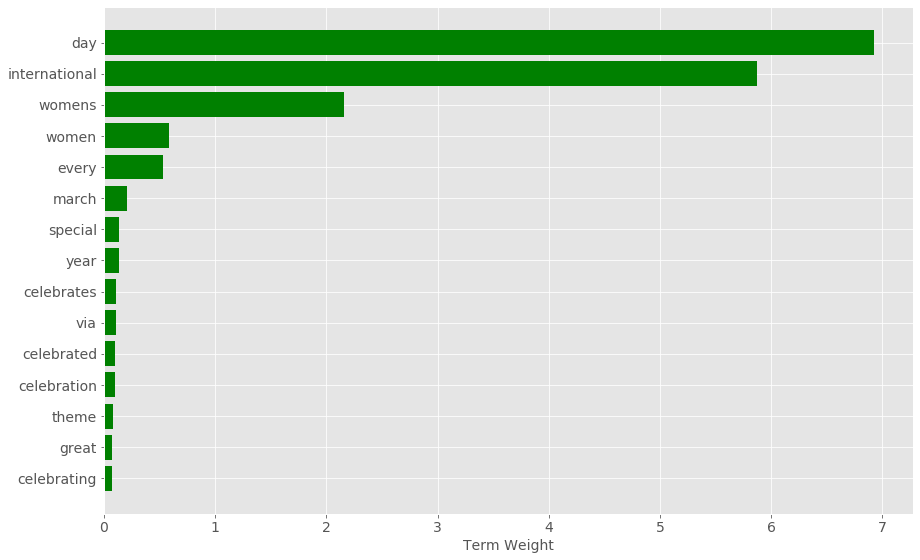

In [12]:
plot_top_term_weights( terms, H, 0, 15 )

### Most Relevant Documents

We can also look at the snippets for the top-ranked documents for each topic. We'll define a function to produce this ranking also.

In [13]:
def get_top_snippets(all_snippets, W, topic_index, top):
    
    # reverse sort the values to sort the indices
    top_indices = np.argsort(W[:, topic_index])[::-1]
    
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    
    for doc_index in top_indices[0:top]:
        top_snippets.append(all_snippets[doc_index])
    
    return top_snippets

For instance, for the first topic listed above, the top 10 documents are:

In [14]:
topic_snippets = get_top_snippets(snippets, W, 0, 10)

for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ((i + 1), snippet))

01. international furry day
02. international writeous day
03. international simping day
04. international hippo manormous day
05. international day
06. international testicle day
07. international baddie day
08. whens international eldritch day
09. international thetan day
10. international womens day international duzi day


Similarly, for the second topic:

In [15]:
topic_snippets = get_top_snippets(snippets, W, 1, 10)

for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ((i + 1), snippet))

01. women imperialists
02. women trumpandemic
03. molesey women striding
04. ninnin women
05. gretings women
06. women eternals
07. women genie
08. women nuturers
09. apocalypse women
10. women superhumans


### Exporting the Results

If we want to keep this topic model for later user, we can save it using *joblib*:

In [16]:
joblib.dump((W,H,terms,snippets), "cenario2-tweets-model-nmf-k%02d.pkl" % k) 

['cenario2-tweets-model-nmf-k10.pkl']